Copyright (c) 2019 [윤기태]

https://github.com/yoonkt200/python-data-analysis

[MIT License](https://github.com/yoonkt200/python-data-analysis/blob/master/LICENSE.txt)

# (가제) 파이썬 데이터 분석

-----

# 2.2) 트위터 API로 연관 키워드 분석하기

### 바로가기

- [<Step1. API 호출> : 트위터 API로 데이터 가져오기](#<Step1.-API-호출>-:-트위터-API로-데이터-가져오기)
    - [API 데이터로 데이터 프레임 생성하기]
- [<Step2. 추출> : 키워드 추출](#<Step2.-추출>-:-키워드-추출)
    - [텍스트 데이터 전처리]
    - [nltk, konlpy를 이용한 키워드 추출]
- [<Step3. 분석> : 연관 분석을 이용한 키워드 분석](#<Step3.-분석>-:-연관-분석을-이용한-키워드-분석)
    - [연관 키워드 추출하기]
    - [단어 빈도 추출하기]
- [<Step4. 시각화> : 연관 키워드 네트워크 시각화](#<Step4.-시각화>-:-연관-키워드-네트워크-시각화)
    - [연관 키워드 네트워크 시각화]

-----

In [1]:
# -*- coding: utf-8 -*-

# 주피터 노트북을 실행한 브라우저에서 바로 그림을 볼 수 있게끔 만드는 것
#브라우저 내부(inline)에 바로 그려지도록 해주는 코드
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# <Step1. API 호출> : 트위터 API로 데이터 가져오기

### [API 데이터로 데이터 프레임 생성하기]
- API 사용법 참고 : https://github.com/yoonkt200/python-data-analysis/blob/master/chapter_text/(%EC%B0%B8%EA%B3%A0)%20using-twitter-api.ipynb
- 아래 코드 실행을 위해, anaconda prompt 혹은 Terminal에서 아래와 같은 패키지를 설치해 줍니다.
    - (env_name) `pip install tweepy`
- 혹은 아래의 코드로 라이브러리를 설치합니다.
- [2022.02.04 ] tweepy 4 버전 설치시 api.search에서 에러 발생 => tweepy 3 버전으로 설치
- pip install tweepy==3.10.0

In [4]:
#!pip install tweepy

     ---------------------------------------- 66.0/66.0 KB ? eta 0:00:00
     ---------------------------------------- 63.1/63.1 KB 3.3 MB/s eta 0:00:00
     -------------------------------------- 151.5/151.5 KB 8.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.26.0
    Uninstalling requests-2.26.0:
      Successfully uninstalled requests-2.26.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.10.1 requires ruamel-yaml, which is not installed.


In [5]:
# tweepy 3 버전으로 설치
#!pip install tweepy==3.10.0

  Attempting uninstall: tweepy
    Found existing installation: tweepy 4.5.0
    Uninstalling tweepy-4.5.0:
      Successfully uninstalled tweepy-4.5.0


-----

##### 트위터 API 가져오기
- 트위터의 키워드 크롤링 기능을 사용하기 위해 트위터 앱에서 발급받은 KEY와 TOKEN 정보를 입력
- 총 4가지 정보를 입력하여 코드 실행
- tweepy의 OAuthHandler() 클래스가 자동으로 개인정보 인증 완료

In [6]:
import tweepy

# 발급 완료된 키 입력
CONSUMER_KEY = "LUCHdCDyarrHrZtB3TphjDPDX"
CONSUMER_SECRET = "cEVd1dTmutWmiISeXlIk7UNZ5qbRlRVJVMg9l4Elvz5GU8doAd"
ACCESS_TOKEN_KEY = "169786640-GXkvSASVzzWCVgIgEtO91ENvZCEE4iGIFde9MDyW"
ACCESS_TOKEN_SECRET = "xC6ghbPWdEKBmBE8Oi6cVdgVVsRzFpmFLINHLcOksa4QA"

# 개인정보 인증을 요청하는 Handler
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)

# 인증 요청을 수행
auth.set_access_token(ACCESS_TOKEN_KEY, ACCESS_TOKEN_SECRET)

# twitter API를 사용하기 위한 준비
api = tweepy.API(auth)

In [7]:
# tweepy 버전 출력
tweepy.__version__

'3.10.0'

-----

#### '손흥민' 키워드 검색

In [82]:
# Twitter Developer Platform의 Data dictionary 참조
# https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet

# twitter API를 사용하여 '손흥민' 이 포함된 트윗들을 크롤링한 뒤, 'user_mentions'와 'hashtags' 속성값 추출
keyword = "빅데이터"

# 특정 키워드 크롤링은  search() 함수 수행
tweets = api.search(keyword)

# entities() 함수로 특정 속성의 메타데이터에 접근하여 정보 추출
for tweet in tweets:
    print(tweet.text)
    print(tweet.entities['user_mentions'])
    print(tweet.entities['hashtags'])
    print(tweet.created_at) # 트윗이 생성된 UTC 시간, 예) "2022-02-04 01:47:09"

RT @AlwaysIFNT69: 성규 내일을 여는 인문학 강의 모음📹
- 전 세계가 주목하는 ESG 경영
https://t.co/8XAMxme2gl
- 동전의 양면 부채
https://t.co/V9O0fPomVj
- 스타트업에서 일하는 이유
http…
[{'screen_name': 'AlwaysIFNT69', 'name': '𝑨𝒍𝒘𝒂𝒚𝒔', 'id': 1091284726734712834, 'id_str': '1091284726734712834', 'indices': [3, 16]}]
[]
2022-02-10 06:00:02
RT @save_sungkyu: 📒 EBS 강의 링크 모음

전 세계가 주목하는 ESG경영
🔗https://t.co/mmNoCrlRlW

스타트업에서 일하는 이유
🔗https://t.co/cvx8sXdQRl

동전의 양면 부채
🔗https://t.c…
[{'screen_name': 'save_sungkyu', 'name': '성규 저장소', 'id': 805393620463325184, 'id_str': '805393620463325184', 'indices': [3, 16]}]
[]
2022-02-10 05:58:11
RT @AlwaysIFNT69: 성규 내일을 여는 인문학 강의 모음📹
- 전 세계가 주목하는 ESG 경영
https://t.co/8XAMxme2gl
- 동전의 양면 부채
https://t.co/V9O0fPomVj
- 스타트업에서 일하는 이유
http…
[{'screen_name': 'AlwaysIFNT69', 'name': '𝑨𝒍𝒘𝒂𝒚𝒔', 'id': 1091284726734712834, 'id_str': '1091284726734712834', 'indices': [3, 16]}]
[]
2022-02-10 05:58:05
📒 EBS 강의 링크 모음

전 세계가 주목하는 ESG경영
🔗https://t.co/mmNoCrlRlW

스타트업에서 일하는 이유
🔗https://t.co/cvx8sXdQRl

동전의 양면 부채
🔗… ht

In [83]:
tweets

[Status(_api=<tweepy.api.API object at 0x00000162C72927C0>, _json={'created_at': 'Thu Feb 10 06:00:02 +0000 2022', 'id': 1491653162188476417, 'id_str': '1491653162188476417', 'text': 'RT @AlwaysIFNT69: 성규 내일을 여는 인문학 강의 모음📹\n- 전 세계가 주목하는 ESG 경영\nhttps://t.co/8XAMxme2gl\n- 동전의 양면 부채\nhttps://t.co/V9O0fPomVj\n- 스타트업에서 일하는 이유\nhttp…', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'AlwaysIFNT69', 'name': '𝑨𝒍𝒘𝒂𝒚𝒔', 'id': 1091284726734712834, 'id_str': '1091284726734712834', 'indices': [3, 16]}], 'urls': [{'url': 'https://t.co/8XAMxme2gl', 'expanded_url': 'https://bit.ly/33bgXCn', 'display_url': 'bit.ly/33bgXCn', 'indices': [59, 82]}, {'url': 'https://t.co/V9O0fPomVj', 'expanded_url': 'https://bit.ly/34yRDqp', 'display_url': 'bit.ly/34yRDqp', 'indices': [95, 118]}]}, 'metadata': {'result_type': 'recent', 'iso_language_code': 'ko'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': N

-----

##### 데이터 프레임 형태로 수집

In [84]:
# 크롤링된 데이터를 저장할 데이터 프레임 생성
columns = ['created', 'tweet_text']
df = pd.DataFrame(columns=columns)

# 크롤링을 수행할 갯수를 입력
max_tweets = 1000

# Cursor 객체를 사용하여 크롤링 수행
# Cursor()로 keyword의 값에 해당하는 정보를  items()으로 지정한 갯수만큼 크롤링
searched_tweets = [status for status in tweepy.Cursor(api.search, q=keyword).items(max_tweets)]

# ‘손흥민’이 포함된 1000개의 트윗들에서, ‘text’, ‘created_at’ 정보를 데이터 프레임으로 저장
for tweet in searched_tweets:
    tweet_json = tweet._json
    tweet_text = tweet_json['text']
    created = tweet_json['created_at']
    row = [created, tweet_text]
    series = pd.Series(row, index=df.columns) #  created, tweet_text로 시리즈를 생성
    df = df.append(series, ignore_index=True) # 생성된 시리즈를 데이터프레임에 추가

In [85]:
# 데이터 프레임 상위 5개 출력
df.head()

,created,tweet_text
0,Thu Feb 10 06:00:02 +0000 2022,RT @AlwaysIFNT69: 성규 내일을 여는 인문학 강의 모음📹\n- 전 세계...
1,Thu Feb 10 05:58:11 +0000 2022,RT @save_sungkyu: 📒 EBS 강의 링크 모음\n\n전 세계가 주목하는...
2,Thu Feb 10 05:58:05 +0000 2022,RT @AlwaysIFNT69: 성규 내일을 여는 인문학 강의 모음📹\n- 전 세계...
3,Thu Feb 10 05:57:59 +0000 2022,📒 EBS 강의 링크 모음\n\n전 세계가 주목하는 ESG경영\n🔗https://t...
4,Thu Feb 10 05:56:29 +0000 2022,RT @L3tsgg0: 빅데이터상 여기서 젤 웃긴사람은 이상한포즈하고있는 오른쪽세명...


In [86]:
# 데이터 프레임을 csv 로 저장
# df.to_csv("tweet_temp.csv", index=False)

-----

# <Step2. 추출> : 키워드 추출

### [텍스트 데이터 전처리]
- 한글 문자열을 기준으로 키워드 추출 수행
- tweet_text 데이터에서 한글 문자열만을 추출하여 ko_text 생성

In [87]:
#df = pd.read_csv("tweet_temp.csv")
#df.head()

In [88]:
# 정규표현 라이브러리
import re

# 텍스트 정제 함수 : 한글 및 띄어쓰기 이외의 문자는 전부 제거
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규표현식
    result = hangul.sub('', text)
    return result

In [89]:
# 텍스트 정제 함수text_cleaning()를 ‘tweet_text’ 피처에 이를 적용, 한글과 띄어쓰기만 추출하여 ko_text 피처 생성
df['ko_text'] = df['tweet_text'].apply(lambda x: text_cleaning(x))
df.head()

,created,tweet_text,ko_text
0,Thu Feb 10 06:00:02 +0000 2022,RT @AlwaysIFNT69: 성규 내일을 여는 인문학 강의 모음📹\n- 전 세계...,성규 내일을 여는 인문학 강의 모음 전 세계가 주목하는 경영 동전의 양면 부채...
1,Thu Feb 10 05:58:11 +0000 2022,RT @save_sungkyu: 📒 EBS 강의 링크 모음\n\n전 세계가 주목하는...,강의 링크 모음전 세계가 주목하는 경영스타트업에서 일하는 이유동전의 양면 부채
2,Thu Feb 10 05:58:05 +0000 2022,RT @AlwaysIFNT69: 성규 내일을 여는 인문학 강의 모음📹\n- 전 세계...,성규 내일을 여는 인문학 강의 모음 전 세계가 주목하는 경영 동전의 양면 부채...
3,Thu Feb 10 05:57:59 +0000 2022,📒 EBS 강의 링크 모음\n\n전 세계가 주목하는 ESG경영\n🔗https://t...,강의 링크 모음전 세계가 주목하는 경영스타트업에서 일하는 이유동전의 양면 부채
4,Thu Feb 10 05:56:29 +0000 2022,RT @L3tsgg0: 빅데이터상 여기서 젤 웃긴사람은 이상한포즈하고있는 오른쪽세명...,빅데이터상 여기서 젤 웃긴사람은 이상한포즈하고있는 오른쪽세명이아니라 뒤돌아있는 ...


-----

### [konlpy를 이용한 키워드 추출]
- 명사만 추출한 후 불용어 및 한글자 키워드 제거

In [90]:
from konlpy.tag import Okt
from collections import Counter

# 불용어 사전의 텍스트 문서 읽어 stopwords 리스트 생성
# 한국어 약식 불용어사전 예시 파일, 출처 - (https://www.ranks.nl/stopwords/korean)
korean_stopwords_path = "../data/korean_stopwords.txt"
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords] # strip()으로 공백 및 줄바꿈 제거

# 품사 중 명사만 추출하여 한글자 키워드 및 불용어 제거
# Okt(Open Korean Text)는 트위터에서 만든 오픈소스 한국어 처리기인 twitter-korean-text를 이어받아 만들고 있는 프로젝트

def get_nouns(x):
    # 명사만 추출
    nouns_tagger = Okt() # Okt()클래스 선언
    nouns = nouns_tagger.nouns(x)
    
    # 한글자 키워드 제거
    nouns = [noun for noun in nouns if len(noun) > 1]
    
    # 불용어를 제거
    nouns = [noun for noun in nouns if noun not in stopwords]
    
    return nouns

In [91]:
stopwords

['아',
 '휴',
 '아이구',
 '아이쿠',
 '아이고',
 '어',
 '나',
 '우리',
 '저희',
 '따라',
 '의해',
 '을',
 '를',
 '에',
 '의',
 '가',
 '으로',
 '로',
 '에게',
 '뿐이다',
 '의거하여',
 '근거하여',
 '입각하여',
 '기준으로',
 '예하면',
 '예를 들면',
 '예를 들자면',
 '저',
 '소인',
 '소생',
 '저희',
 '지말고',
 '하지마',
 '하지마라',
 '다른',
 '물론',
 '또한',
 '그리고',
 '비길수 없다',
 '해서는 안된다',
 '뿐만 아니라',
 '만이 아니다',
 '만은 아니다',
 '막론하고',
 '관계없이',
 '그치지 않다',
 '그러나',
 '그런데',
 '하지만',
 '든간에',
 '논하지 않다',
 '따지지 않다',
 '설사',
 '비록',
 '더라도',
 '아니면',
 '만 못하다',
 '하는 편이 낫다',
 '불문하고',
 '향하여',
 '향해서',
 '향하다',
 '쪽으로',
 '틈타',
 '이용하여',
 '타다',
 '오르다',
 '제외하고',
 '이 외에',
 '이 밖에',
 '하여야',
 '비로소',
 '한다면 몰라도',
 '외에도',
 '이곳',
 '여기',
 '부터',
 '기점으로',
 '따라서',
 '할 생각이다',
 '하려고하다',
 '이리하여',
 '그리하여',
 '그렇게 함으로써',
 '하지만',
 '일때',
 '할때',
 '앞에서',
 '중에서',
 '보는데서',
 '으로써',
 '로써',
 '까지',
 '해야한다',
 '일것이다',
 '반드시',
 '할줄알다',
 '할수있다',
 '할수있어',
 '임에 틀림없다',
 '한다면',
 '등',
 '등등',
 '제',
 '겨우',
 '단지',
 '다만',
 '할뿐',
 '딩동',
 '댕그',
 '대해서',
 '대하여',
 '대하면',
 '훨씬',
 '얼마나',
 '얼마만큼',
 '얼마큼',
 '남짓',
 '여',
 '얼마간',
 '약간',
 '다소',
 '좀',
 '조

In [92]:
# ‘ko_text’ 피처에 get_nouns() 함수를 적용하여 불용어 및 한글자를 제거한 명사 추출하여 'nouns' 피처 생성
df['nouns'] = df['ko_text'].apply(lambda x: get_nouns(x))
print(df.shape) # 행과 열의 갯수를 튜플로 반환
df.head()

(1000, 4)


,created,tweet_text,ko_text,nouns
0,Thu Feb 10 06:00:02 +0000 2022,RT @AlwaysIFNT69: 성규 내일을 여는 인문학 강의 모음📹\n- 전 세계...,성규 내일을 여는 인문학 강의 모음 전 세계가 주목하는 경영 동전의 양면 부채...,"[성규, 내일, 인문학, 강의, 모음, 세계, 주목, 경영, 동전, 양면, 부채, ..."
1,Thu Feb 10 05:58:11 +0000 2022,RT @save_sungkyu: 📒 EBS 강의 링크 모음\n\n전 세계가 주목하는...,강의 링크 모음전 세계가 주목하는 경영스타트업에서 일하는 이유동전의 양면 부채,"[강의, 링크, 세계, 주목, 스타트업, 이유, 동전, 양면, 부채]"
2,Thu Feb 10 05:58:05 +0000 2022,RT @AlwaysIFNT69: 성규 내일을 여는 인문학 강의 모음📹\n- 전 세계...,성규 내일을 여는 인문학 강의 모음 전 세계가 주목하는 경영 동전의 양면 부채...,"[성규, 내일, 인문학, 강의, 모음, 세계, 주목, 경영, 동전, 양면, 부채, ..."
3,Thu Feb 10 05:57:59 +0000 2022,📒 EBS 강의 링크 모음\n\n전 세계가 주목하는 ESG경영\n🔗https://t...,강의 링크 모음전 세계가 주목하는 경영스타트업에서 일하는 이유동전의 양면 부채,"[강의, 링크, 세계, 주목, 스타트업, 이유, 동전, 양면, 부채]"
4,Thu Feb 10 05:56:29 +0000 2022,RT @L3tsgg0: 빅데이터상 여기서 젤 웃긴사람은 이상한포즈하고있는 오른쪽세명...,빅데이터상 여기서 젤 웃긴사람은 이상한포즈하고있는 오른쪽세명이아니라 뒤돌아있는 ...,"[빅데이터, 사람, 포즈, 오른쪽, 세명, 왼쪽, 명일, 가능성]"


-----

# <Step3. 분석> : 연관 분석을 이용한 키워드 분석

### [연관 키워드 추출하기]

### [연관 규칙]
- https://ratsgo.github.io/machine%20learning/2017/04/08/apriori/
- 연관규칙 (아프리오리, Apriori 알고리즘) https://blog.naver.com/zzz90zzz/221807210555
- 연관규칙은 비지도학습으로 대규모 거래 데이터로 부터 함께 구매될 규칙을 도출하여 고객이 특정 상품 구매시 이와 연관성이 높은 상품을 추천하는 것
- Apriori 알고리즘 : 간단한 성능 측정치를 이용해 거대한 DB에서 데이터간의 연관성을 찾는 알고리즘
### [ 연관규칙에서 사용하는 3가지 통계척도 ]
- 1. 지지도 (support)  : 특정 아이템이 데이터에서 발생하는 빈도 
- 2. 신뢰도 (confidence) : 두 아이템의 연관규칙이 유용한 규칙일 가능성의 척도 
- 3. 향상도 (lift) : 두 아이템의 연관 규칙이 우연인지 아닌지를 나타내는 척도 

- 아래 코드 실행을 위해, anaconda prompt 혹은 Terminal에서 아래와 같은 패키지들을 설치
    - (env_name) `pip install apriori apyori`
- 혹은 아래의 코드로 라이브러리를 설치

In [93]:
#!pip install apriori apyori

-----

##### 트위터 연관 키워드 분석

In [94]:
# 트랜잭션 데이터를 추출
transactions = df['nouns'].tolist()
#transactions = [transaction for transaction in transactions if transaction] # 공백 문자열을 방지
print(transactions)

[['성규', '내일', '인문학', '강의', '모음', '세계', '주목', '경영', '동전', '양면', '부채', '스타트업', '이유'], ['강의', '링크', '세계', '주목', '스타트업', '이유', '동전', '양면', '부채'], ['성규', '내일', '인문학', '강의', '모음', '세계', '주목', '경영', '동전', '양면', '부채', '스타트업', '이유'], ['강의', '링크', '세계', '주목', '스타트업', '이유', '동전', '양면', '부채'], ['빅데이터', '사람', '포즈', '오른쪽', '세명', '왼쪽', '명일', '가능성'], ['성규', '내일', '인문학', '강의', '모음', '세계', '주목', '경영', '동전', '양면', '부채', '스타트업', '이유'], ['빅데이터', '사람', '포즈', '오른쪽', '세명', '왼쪽', '명일', '가능성'], ['성규', '내일', '인문학', '강의', '모음', '세계', '주목', '경영', '동전', '양면', '부채', '스타트업', '이유'], ['빅데이터', '사람', '포즈', '오른쪽', '세명', '왼쪽', '명일', '가능성'], ['영향력', '성규', '출연', '강의', '목록', '타래', '추가', '세계', '주목', '동전', '양면', '부채', '스타트업', '유세'], ['성규', '내일', '인문학', '강의', '모음', '세계', '주목', '경영', '동전', '양면', '부채', '스타트업', '이유'], ['성규', '내일', '인문학', '강의', '모음', '세계', '주목', '경영', '동전', '양면', '부채', '스타트업', '이유'], ['성규', '내일', '인문학', '강의', '모음', '세계', '주목', '경영', '동전', '양면', '부채', '스타트업', '이유'], ['빅데이터', '사람', '포즈', '오른쪽', '세명', '왼쪽', '명일', '가능성'

In [95]:
# 연관 분석을 수행
results = list(apriori(transactions,
                       min_support=0.05,#지지도0.05
                       min_confidence=0.1,#신뢰도0.1
                       min_lift=5,#향상도 5
                       max_length=2))
print(results)

[RelationRecord(items=frozenset({'가능성', '명일'}), support=0.193, ordered_statistics=[OrderedStatistic(items_base=frozenset({'가능성'}), items_add=frozenset({'명일'}), confidence=1.0, lift=5.181347150259067), OrderedStatistic(items_base=frozenset({'명일'}), items_add=frozenset({'가능성'}), confidence=1.0, lift=5.181347150259067)]), RelationRecord(items=frozenset({'세명', '가능성'}), support=0.193, ordered_statistics=[OrderedStatistic(items_base=frozenset({'가능성'}), items_add=frozenset({'세명'}), confidence=1.0, lift=5.181347150259067), OrderedStatistic(items_base=frozenset({'세명'}), items_add=frozenset({'가능성'}), confidence=1.0, lift=5.181347150259067)]), RelationRecord(items=frozenset({'가능성', '오른쪽'}), support=0.193, ordered_statistics=[OrderedStatistic(items_base=frozenset({'가능성'}), items_add=frozenset({'오른쪽'}), confidence=1.0, lift=5.181347150259067), OrderedStatistic(items_base=frozenset({'오른쪽'}), items_add=frozenset({'가능성'}), confidence=1.0, lift=5.181347150259067)]), RelationRecord(items=frozenset({'가능성

In [96]:
for result in results:
    print(result)

RelationRecord(items=frozenset({'가능성', '명일'}), support=0.193, ordered_statistics=[OrderedStatistic(items_base=frozenset({'가능성'}), items_add=frozenset({'명일'}), confidence=1.0, lift=5.181347150259067), OrderedStatistic(items_base=frozenset({'명일'}), items_add=frozenset({'가능성'}), confidence=1.0, lift=5.181347150259067)])
RelationRecord(items=frozenset({'세명', '가능성'}), support=0.193, ordered_statistics=[OrderedStatistic(items_base=frozenset({'가능성'}), items_add=frozenset({'세명'}), confidence=1.0, lift=5.181347150259067), OrderedStatistic(items_base=frozenset({'세명'}), items_add=frozenset({'가능성'}), confidence=1.0, lift=5.181347150259067)])
RelationRecord(items=frozenset({'가능성', '오른쪽'}), support=0.193, ordered_statistics=[OrderedStatistic(items_base=frozenset({'가능성'}), items_add=frozenset({'오른쪽'}), confidence=1.0, lift=5.181347150259067), OrderedStatistic(items_base=frozenset({'오른쪽'}), items_add=frozenset({'가능성'}), confidence=1.0, lift=5.181347150259067)])
RelationRecord(items=frozenset({'가능성', '

In [97]:
# 데이터 프레임 형태로 정리
columns = ['source', 'target', 'support']
network_df = pd.DataFrame(columns=columns)

# 규칙의 조건절을 source, 결과절을 target, 지지도를 support 라는 데이터 프레임의 피처로 변환
for result in results:
    if len(result.items) == 2:
        items = [x for x in result.items]
        row = [items[0], items[1], result.support]
        series = pd.Series(row, index=network_df.columns)
        network_df = network_df.append(series, ignore_index=True)

network_df.head()

,source,target,support
0,가능성,명일,0.193
1,세명,가능성,0.193
2,가능성,오른쪽,0.193
3,가능성,왼쪽,0.193
4,가능성,포즈,0.193


-----

### [단어 빈도 추출하기]

##### 말뭉치 추출

In [98]:
# 말뭉치를 추출합
tweet_corpus = "".join(df['ko_text'].tolist())
print(tweet_corpus)

  성규 내일을 여는 인문학 강의 모음 전 세계가 주목하는  경영 동전의 양면 부채 스타트업에서 일하는 이유    강의 링크 모음전 세계가 주목하는 경영스타트업에서 일하는 이유동전의 양면 부채  성규 내일을 여는 인문학 강의 모음 전 세계가 주목하는  경영 동전의 양면 부채 스타트업에서 일하는 이유  강의 링크 모음전 세계가 주목하는 경영스타트업에서 일하는 이유동전의 양면 부채   빅데이터상 여기서 젤 웃긴사람은 이상한포즈하고있는 오른쪽세명이아니라 뒤돌아있는 왼쪽한명일가능성이큼  성규 내일을 여는 인문학 강의 모음 전 세계가 주목하는  경영 동전의 양면 부채 스타트업에서 일하는 이유  빅데이터상 여기서 젤 웃긴사람은 이상한포즈하고있는 오른쪽세명이아니라 뒤돌아있는 왼쪽한명일가능성이큼  성규 내일을 여는 인문학 강의 모음 전 세계가 주목하는  경영 동전의 양면 부채 스타트업에서 일하는 이유  빅데이터상 여기서 젤 웃긴사람은 이상한포즈하고있는 오른쪽세명이아니라 뒤돌아있는 왼쪽한명일가능성이큼  선한 영향력 펼치고 있는 성규 출연 강의 목록 타래로 추가될 수 있음전 세계가 주목하는  경영동전의 양면 부채스타트업에서 일하는 이유세상을 여는  성규 내일을 여는 인문학 강의 모음 전 세계가 주목하는  경영 동전의 양면 부채 스타트업에서 일하는 이유  성규 내일을 여는 인문학 강의 모음 전 세계가 주목하는  경영 동전의 양면 부채 스타트업에서 일하는 이유  성규 내일을 여는 인문학 강의 모음 전 세계가 주목하는  경영 동전의 양면 부채 스타트업에서 일하는 이유  빅데이터상 여기서 젤 웃긴사람은 이상한포즈하고있는 오른쪽세명이아니라 뒤돌아있는 왼쪽한명일가능성이큼빅데이터 추출기반 주식디비효율로 보여드리겠습니다주식디비주식디비팝니다   성규 내일을 여는 인문학 강의 모음 전 세계가 주목하는  경영 동전의 양면 부채 스타트업에서 일하는 이유  성규 내일을 여는 인문학 강의 모음 전 세계가 주목하는  경영 동전의 양면 부채 스타트업에서 일하는 이유  선한 영향력 펼치고 있는 성규 출연 강

In [99]:
from konlpy.tag import Okt
from collections import Counter

# 명사 키워드를 추출, 빈도수 계산
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(tweet_corpus)
count = Counter(nouns)

# 한글자 키워드를 제거
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
print(remove_char_counter)

Counter({'빅데이터': 840, '안정': 686, '가수': 406, '추천': 347, '노래': 346, '회수': 344, '수가': 344, '호랑': 343, '가가': 343, '방법': 343, '국악': 343, '유튜': 343, '버들': 343, '확보': 343, '조회': 343, '나오니': 343, '노출': 343, '켄시': 343, '유행': 343, '계층': 343, '사람': 219, '여기': 193, '포즈': 193, '오른쪽': 193, '세명': 193, '왼쪽': 193, '명일': 193, '가능성': 193, '브랜드': 173, '스타트업': 159, '세계': 148, '강의': 147, '주목': 147, '동전': 147, '양면': 147, '부채': 147, '이상': 146, '성규': 145, '표시': 144, '만원': 144, '투표': 134, '순위': 125, '종합': 120, '이유': 113, '모음': 112, '이찬원': 112, '내일': 111, '인문학': 111, '경영': 111, '배우': 104, '분석': 83, '결과': 71, '앞서': 69, '스타': 68, '위관': 63, '방탄소년단': 59, '지민': 59, '여자': 57, '장민호': 55, '이름': 49, '주차': 48, '파워': 48, '랭킹': 48, '천만': 48, '기부': 48, '송가': 44, '타래': 42, '디비': 37, '기반': 35, '주식': 35, '영향력': 34, '출연': 34, '목록': 34, '추가': 34, '유세': 33, '배달': 28, '이벤트': 28, '중고차': 25, '사랑': 24, '후보': 24, '이재명': 20, '브라운': 20, '수트': 20, '스타일리시': 20, '추출': 19, '효율': 18, '비주': 18, '임영웅': 17, '준호': 17, '센터': 17, '허위': 16, '매물': 16

-----

##### 단어 빈도 점수 추가

In [100]:
# 키워드와 키워드 빈도 점수를 ‘node’, ‘nodesize’ 라는 데이터 프레임의 피처로 생성
node_df = pd.DataFrame(remove_char_counter.items(), columns=['node', 'nodesize'])
node_df = node_df[node_df['nodesize'] >= 50] # 시각화의 편의를 위해 ‘nodesize’ 50 이하는 제거합니다.
node_df.head()

,node,nodesize
0,성규,145
1,내일,111
2,인문학,111
3,강의,147
4,모음,112


-----

# <Step4. 시각화> : 연관 키워드 네트워크 시각화

### [연관 키워드 네트워크 시각화]

- 아래 코드 실행을 위해, anaconda prompt 혹은 Terminal에서 아래와 같은 패키지를 설치해 줍니다.
    - (env_name) `pip install networkx`
- 혹은 아래의 코드로 라이브러리를 설치합니다.
- networkx 버전 2.3 이하를 설치하는 경우, 아래 코드를 다음과 같이 바꿔주어야 합니다.
    - `sizes = [G.nodes[node]['nodesize']*25 for node in G]` -> `sizes = [G.node[node]['nodesize']*25 for node in G]`

In [101]:
#!pip install networkx

-----

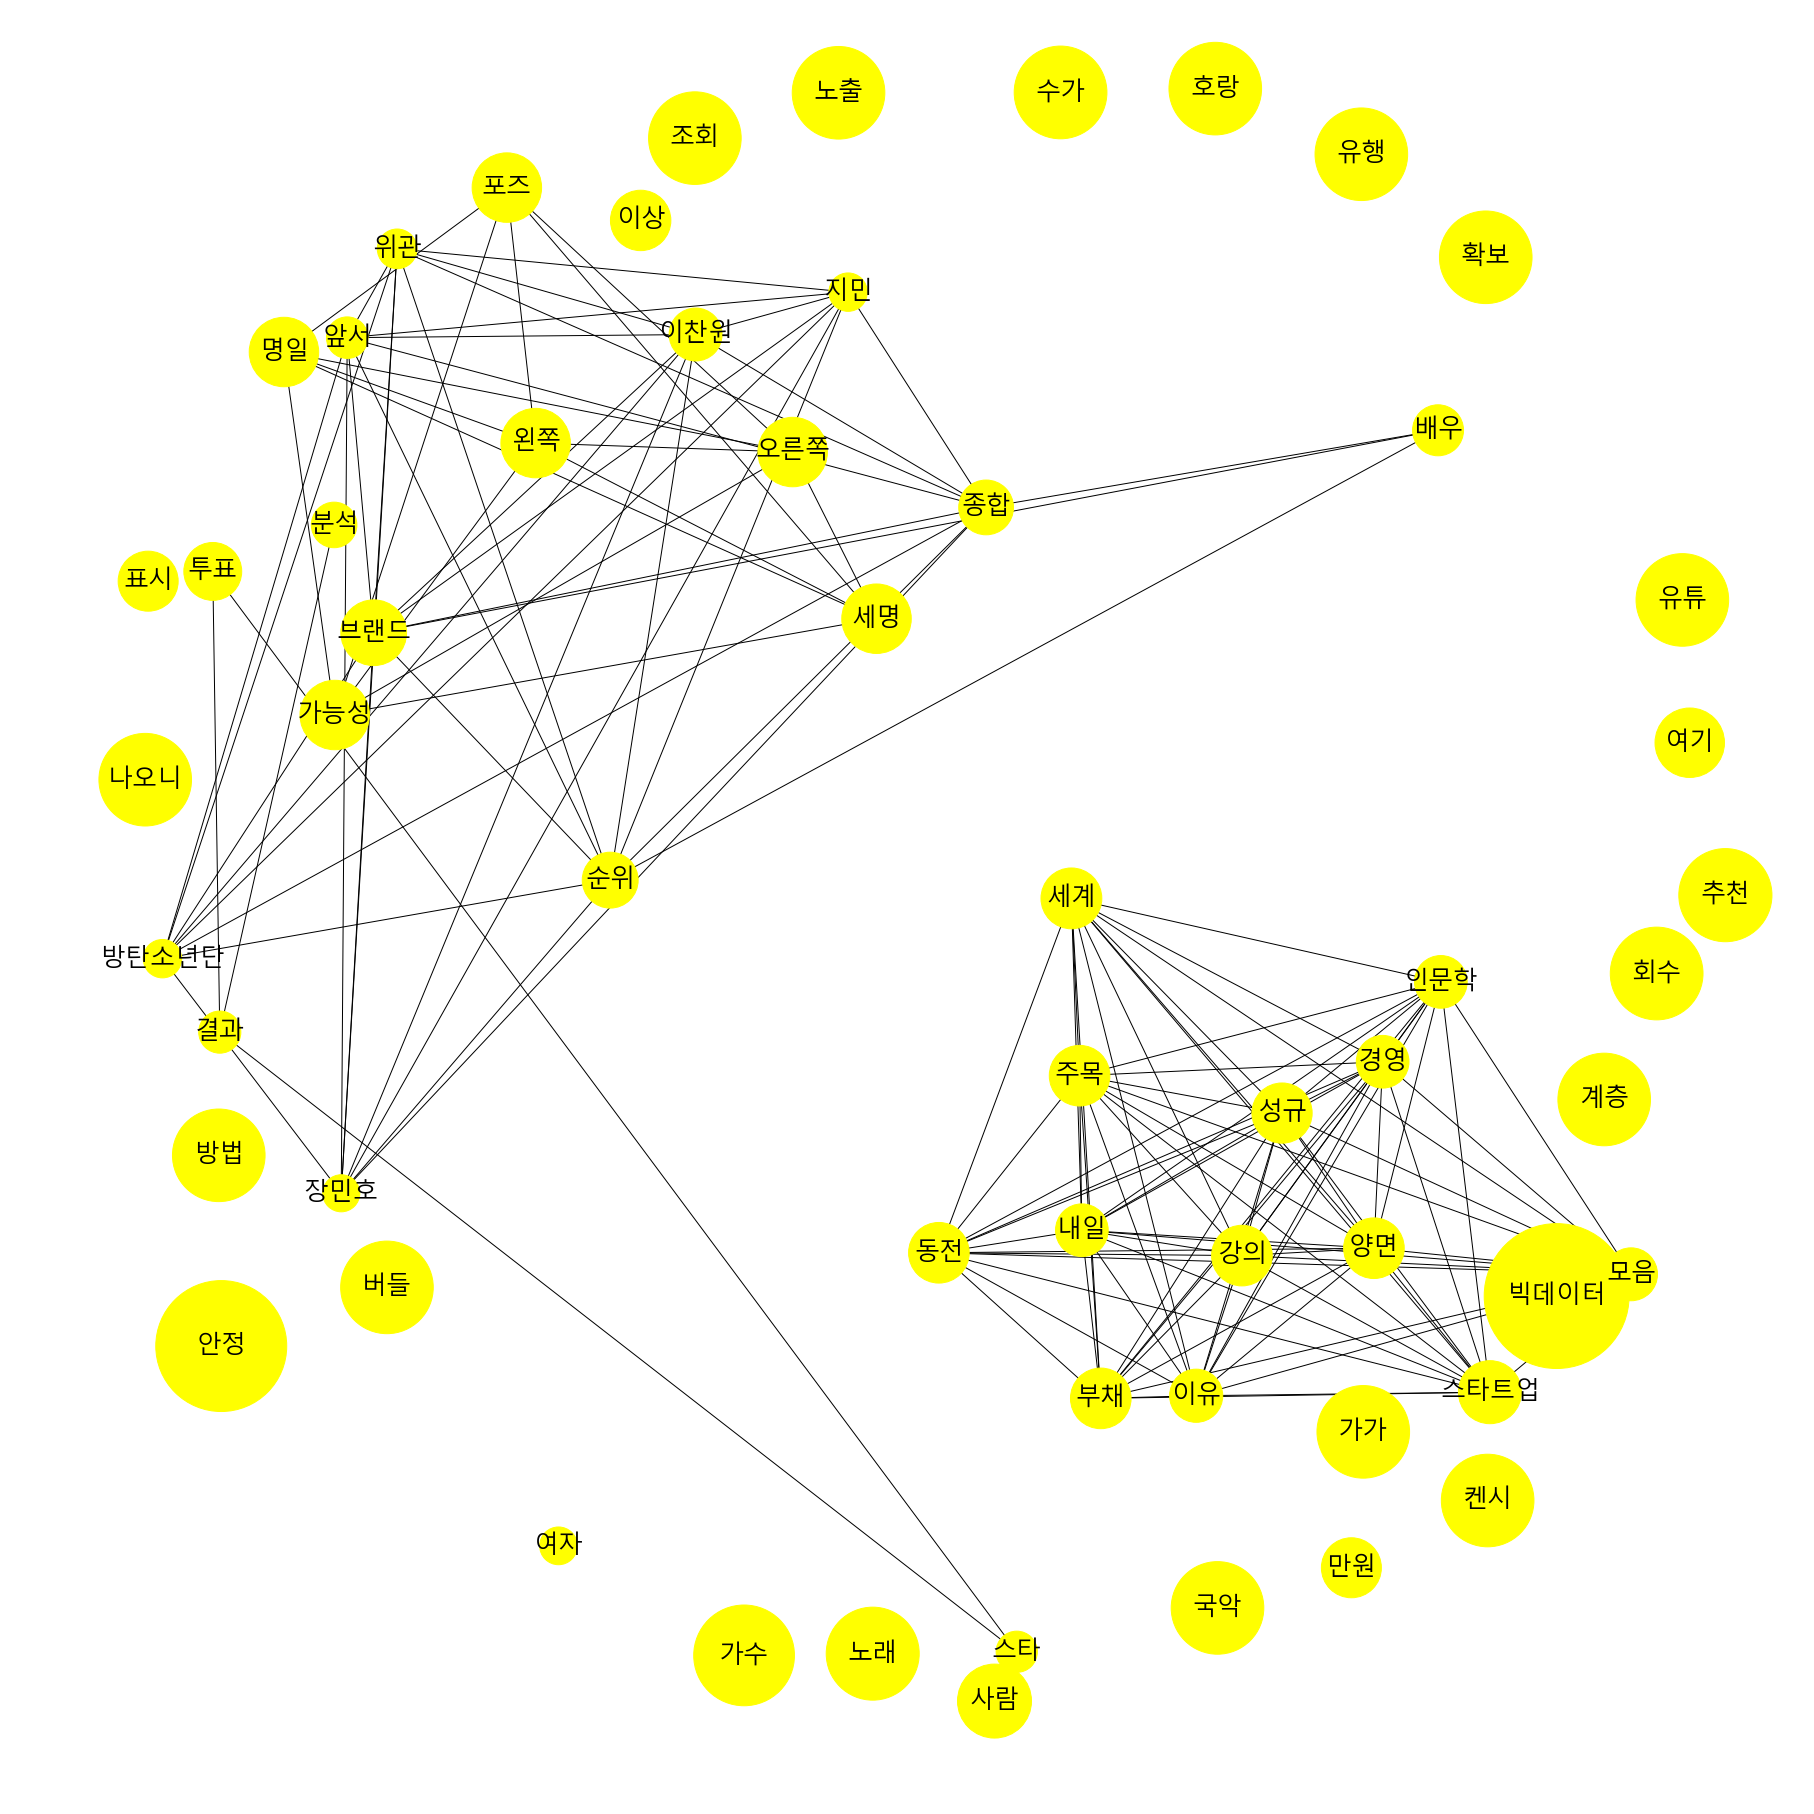

In [102]:
import networkx as nx
plt.figure(figsize=(25,25))

# networkx 그래프 객체를 생성
G = nx.Graph()

# node_df의 키워드 빈도수를 데이터로 하여, 네트워크 그래프의 ‘노드’ 역할을 하는 원을 생성
for index, row in node_df.iterrows():
    G.add_node(row['node'], nodesize=row['nodesize'])
    
# network_df의 연관 분석 데이터를 기반으로, 네트워크 그래프의 ‘관계’ 역할을 하는 선을 생성
for index, row in network_df.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['support'])])
    
# 그래프 디자인과 관련된 파라미터를 설정
pos = nx.spring_layout(G, k=0.6, iterations=50)
# nx.draw(G, pos=pos)
sizes = [G.nodes[node]['nodesize']*25 for node in G]
nx.draw(G, pos=pos, node_size=sizes,node_color='yellow')


# Windows 사용자는 AppleGothic 대신,'Malgun Gothic'. 그 외 OS는 OS에서 한글을 지원하는 기본 폰트를 입력
# nx.draw_networkx_labels(G, pos=pos, font_family='NanumGothic', font_size=25)
nx.draw_networkx_labels(G, pos=pos, font_family='Malgun Gothic', font_size=25)

# 그래프를 출력
ax = plt.gca()
plt.show()